In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = 1
a = 2
k = 3 
L = 4
b = .005
f = k/L
phi = np.pi
t = np.arange(-50*np.pi,50*np.pi,0.001)
h1=c+a*np.cos(f*t+phi)
h2=a*np.exp(-b*(t-L/2)**2)

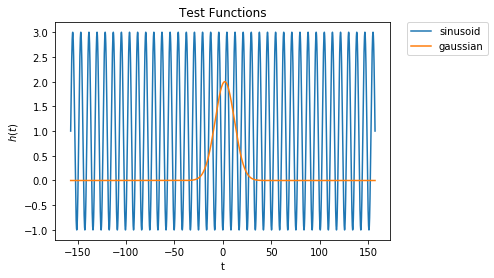

In [3]:
plt.plot(t,h1,label='sinusoid')
plt.plot(t,h2,label='gaussian')
plt.title('Test Functions')
plt.xlabel('t')
plt.ylabel(r'$h(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

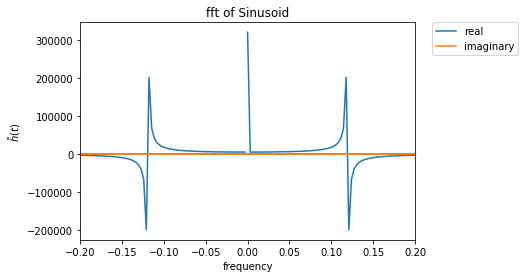

In [4]:
h1t=np.fft.fft(h1)
freq = np.fft.fftfreq(t.shape[-1],d =.001)
plt.plot(freq, h1t.real, label='real')
plt.plot(freq, h1t.imag, label='imaginary')
plt.xlim(-.2,.2)
plt.title('fft of Sinusoid')
plt.xlabel('frequency')
plt.ylabel(r'$\tilde{h}(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

C:\Users\ksomi\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


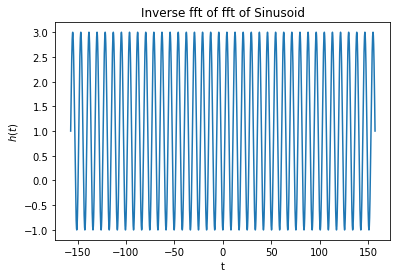

In [5]:
h1ti=np.fft.ifft(h1t)
plt.plot(t,h1ti)
plt.title('Inverse fft of fft of Sinusoid')
plt.xlabel('t')
plt.ylabel(r'$h(t)$')
plt.show()

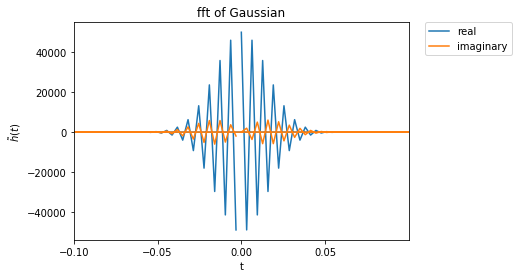

In [6]:
h2t=np.fft.fft(h2)
freq = np.fft.fftfreq(t.shape[-1], d= .001)
plt.plot(freq, h2t.real, label = 'real')
plt.plot(freq, h2t.imag, label='imaginary')
plt.xlim(-.1,.1)
plt.xticks(np.arange(-.1, .1, step=0.05))
plt.title('fft of Gaussian')
plt.xlabel('t')
plt.ylabel(r'$\tilde{h}(t)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

C:\Users\ksomi\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


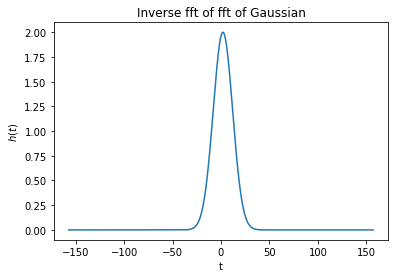

In [7]:
h2ti=np.fft.ifft(h2t)
plt.plot(t,h2ti)
plt.title('Inverse fft of fft of Gaussian')
plt.xlabel('t')
plt.ylabel(r'$h(t)$')
plt.show()

In [8]:
acy = np.loadtxt('arecibo1.txt')
acx = np.arange(0,32768,1)

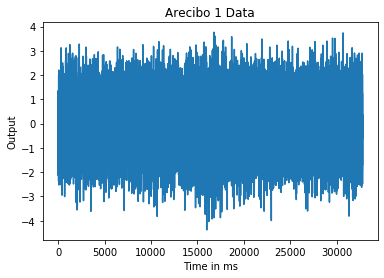

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(acx,acy)
plt.title('Arecibo 1 Data')
plt.ylabel('Output')
plt.xlabel('Time in ms')
plt.show()

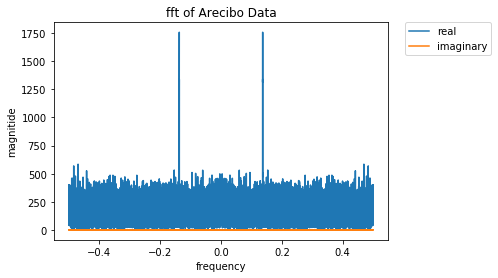

In [10]:
acyt = np.fft.fft(acy)
mag = np.abs(acyt)
el = np.arange(0,32768,1)
freq = np.fft.fftfreq(el.shape[-1])
plt.plot(freq, mag.real, label='real')
plt.plot(freq, mag.imag, label='imaginary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('fft of Arecibo Data')
plt.xlabel('frequency')
plt.ylabel('magnitide')
plt.show()

In [11]:
np.argmax(mag)

4489

In [12]:
freq[4489]*1000

136.993408203125

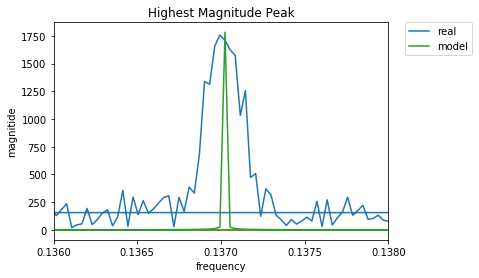

In [63]:
plt.plot(freq, mag.real, label='real')
plt.plot(freq, mag.imag)
plt.xlim(.136,.138)
plt.xticks(np.arange(.136, .138, step=.0005))
a = 19.7105
mod1=np.sin(a*el)
mod1t=np.fft.fft(mod1)
mod2=np.exp(-(el-.137)**2/(.092)**2)
mod2t=np.fft.fft(mod2)
mod= np.absolute(mod2t*mod1t)
plt.plot(freq,mod, label='model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Highest Magnitude Peak')
plt.xlabel('frequency')
plt.ylabel('magnitide')
plt.show()

let's try tweaking the parameters

we are using a gaussian envelope $exp[-(t-t_0)^2/\Delta t^2]$

first change $t_0$, we see that this changes the height of our model

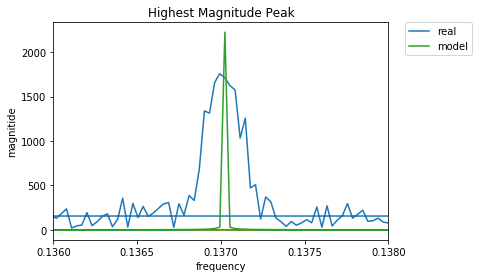

In [66]:
plt.plot(freq, mag.real, label='real')
plt.plot(freq, mag.imag)
plt.xlim(.136,.138)
plt.xticks(np.arange(.136, .138, step=.0005))
a = 19.7105
amod1=np.sin(a*el)
amod1t=np.fft.fft(amod1)
amod2=np.exp(-(el-.13)**2/(.092)**2)
amod2t=np.fft.fft(amod2)
amod= np.absolute(amod2t*amod1t)
plt.plot(freq,amod, label='model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Highest Magnitude Peak')
plt.xlabel('frequency')
plt.ylabel('magnitide')
plt.show()

now we will change $\Delta t$

we see that this also changes height

I do not know how to change the width of this model, so I focused on matchng the position and height. I think my original nodel is the best I can get using the gaussian described in the assignment.

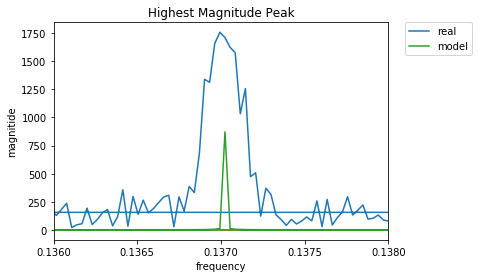

In [81]:
plt.plot(freq, mag.real, label='real')
plt.plot(freq, mag.imag)
plt.xlim(.136,.138)
plt.xticks(np.arange(.136, .138, step=.0005))
a = 19.7105
bmod1=np.sin(a*el)
bmod1t=np.fft.fft(bmod1)
bmod2=np.exp(-(el-.137)**2/(.08)**2)
bmod2t=np.fft.fft(bmod2)
bmod= np.absolute(bmod2t*bmod1t)
plt.plot(freq,bmod, label='model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Highest Magnitude Peak')
plt.xlabel('frequency')
plt.ylabel('magnitide')
plt.show()

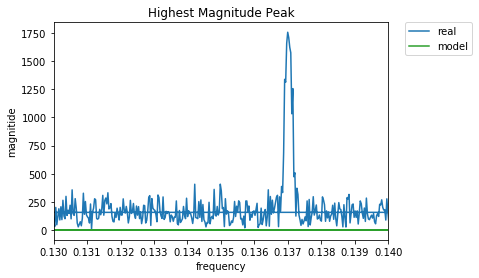

In [82]:
#define a new function as the product of the two 
#and use fft to do the fourier transform on that.
# this does not give us the envelope we desire 
plt.plot(freq, mag.real, label='real')
plt.plot(freq, mag.imag)
plt.xlim(.13,.14)
plt.xticks(np.arange(.13, .14, step=.001))
a = 19.7105
mod3=np.sin(a*el)
mod4=np.exp(-(el-.137)**2/(.092)**2)
mod5=mod3*mod4
mod5t=np.fft.fft(mod5)
mod6= np.absolute(mod5t)
plt.plot(freq,mod6, label='model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Highest Magnitude Peak')
plt.xlabel('frequency')
plt.ylabel('magnitide')
plt.show()

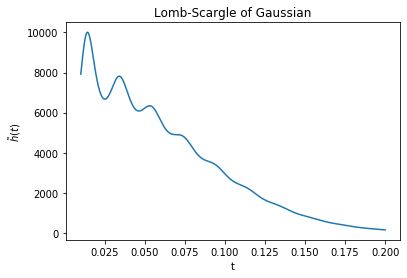

In [14]:
import scipy.signal as signal
fr1 = np.linspace(0.01, .2, 1000)
gls = signal.lombscargle(t, h2, fr1)
plt.plot(fr1, gls)
plt.title('Lomb-Scargle of Gaussian')
plt.xlabel('t')
plt.ylabel(r'$\tilde{h}(t)$')
plt.show()

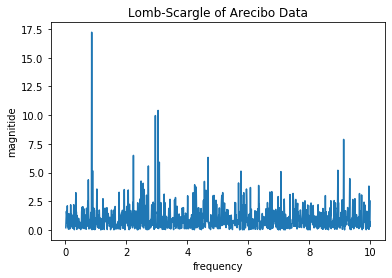

In [15]:
fr2 = np.linspace(0.01, 10, 1000)
acls = signal.lombscargle(acx, acy, fr2)
plt.plot(fr2, acls)
plt.title('Lomb-Scargle of Arecibo Data')
plt.xlabel('frequency')
plt.ylabel('magnitide')
plt.show()

In [16]:
import urllib
from urllib import request
from urllib import parse

url = 'http://nesssi.cacr.caltech.edu/cgi-bin/getcssconedbid_release2.cgi'
values = {'Name' : 'Her X-1',
          'Radius': '.1',
         '.submit' : 'Submit',
         'DB' : 'photcat',
         'OUT' : 'web',
         'SHORT' : 'short',
         'PLOT' : 'plot'}
data = urllib.parse.urlencode(values) 
data = data.encode('ascii')
req = urllib.request.Request(url, data)
resp = urllib.request.urlopen(req)
output = resp.read()

In [17]:
stringoutput = output.decode('ASCII')

In [18]:
spl = stringoutput.split('data:')
data0= spl[1]

In [19]:
data1 = data0.split('}')[0]

In [20]:
data2=data1.lstrip()

In [21]:
from ast import literal_eval as le
data3 = le(data2)

In [22]:
def extr(lst,el): 
    return [item[el] for item in lst]
x = extr(data3,0)
y = extr(data3,1)

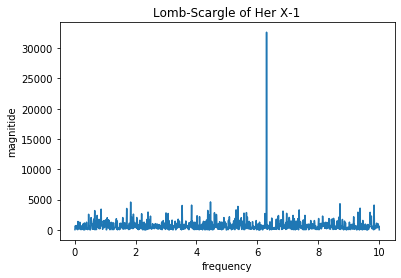

In [23]:
fr3 = np.linspace(0.01, 10, 1000)
hxls = signal.lombscargle(x, y, fr3)
plt.plot(fr3, hxls)
plt.title('Lomb-Scargle of Her X-1')
plt.xlabel('frequency')
plt.ylabel('magnitide')
plt.show()